<a href="https://colab.research.google.com/github/aureliowozhiak/facebook_prophet_covid19/blob/main/notebooks/Facebook_Prophet_e_os_casos_de_COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

<p align="center"><img src="https://raw.githubusercontent.com/aureliowozhiak/facebook_prophet_covid19/main/images/prophet_logo.png" /></p>

# Facebook Prophet e os casos de COVID-19

## Análisando a série temporal dos casos de Corona Virus em Curitiba-PR e criando previsões<sup>*</sup> com o Facebook Prophet

<sup><sub>*As previsões criadas aqui pelo Prophet não são exatas pois não mostram de fato o cenário futuro do corona virus, pois os dados utilizados apenas nos dão uma visão, com base no que aconteceu no passado, para termos uma noção de qual poderia ser a tendência de crescimento dos casos, porém, como os dados não exprimem  o cenário completo e não leva em conta campanhas futuras de vacinação, que já estão acontecendo, não devemos levar essas conclusões como se fossem verdades absolutas.</sub></sup>


---
## Visão geral do projeto:

 - Objetivo do projeto
 - Introdução
     - O Brasil em dados libertos
     - A pandêmia do COVID-19
     - O que é o Facebook Prophet?
 - Origem dos dados e informações técnicas
 - Importação de bibliotecas
 - Carregamento e Processamento dos dados
 - Análisando a série temporal dos casos de COVID-19 em Curitiba-PR
 - Criando o modelo de previsão
 - Plotando as previsões com o Prophet<sup>*</sup>
 - Pesquisa complementar
 - Conclusão
 - Referências

---
### 🎯 Objetivo do projeto

A ideia aqui é efetuar algumas analises nos dados referentes ao casos de COVID-19 desde seu primeiro caso aqui no Brasil até o momento e tentar efetuar algumas previsões* utilizando uma ferramenta de open source para forecasting(previsão) do Facebook, o Prophet!

---
### ⭐ Introdução

#### - O Brasil.io

O [brasil.io](https://brasil.io/home/) surgiu com o objetivo de disponibilizar dados públicos de forma mais acessível para qualquer pessoa conseguir acessar e fazer uso desses dados.

![](https://raw.githubusercontent.com/aureliowozhiak/facebook_prophet_covid19/main/images/brasil.io.png)

>Após a criação da Lei de Acesso à Informação, todas as informações produzidas ou custodiadas pelo poder público são públicas e portanto, disponíveis a todos os cidadãos, exceto aquelas que são sigilosas por lei. Contudo, mesmo que a informação esteja disponível não significa que ela está em um formato acessível 

<sub>adaptado: https://brasil.io/manifesto/ - acesso em: 16/06/2021 </sub>

#### - A pandêmia do COVID-19

![](https://raw.githubusercontent.com/aureliowozhiak/facebook_prophet_covid19/main/images/SARS-CoV-2_without_background.png)

>A pandemia de COVID-19, também conhecida como pandemia de coronavírus, é uma pandemia em curso de COVID-19, uma doença respiratória causada pelo coronavírus da síndrome respiratória aguda grave 2 (SARS-CoV-2). O vírus tem origem zoonótica e o primeiro caso conhecido da doença remonta a dezembro de 2019 em Wuhan, na China. Em 20 de janeiro de 2020, a Organização Mundial da Saúde (OMS) classificou o surto como Emergência de Saúde Pública de Âmbito Internacional e, em 11 de março de 2020, como pandemia. Em 16 de junho de 2021, 176 568 410 casos foram confirmados em 192 países e territórios, com 3 819 480 mortes atribuídas à doença, tornando-se uma das pandemias mais mortais da história.

<sub>adaptado: https://pt.wikipedia.org/wiki/Pandemia_de_COVID-19 - acesso em: 16/06/2021 </sub>

#### O que é o Facebook Prophet?

Em fevereiro de 2017 o Facebook Research lançou a ferramenta open source chamada [Facebook Prophet](https://facebook.github.io/prophet/) para previsão de séries temporais, ou seja, esse algortimo "profeta" do Facebook tem por objetivo principal prever uma tendência no comportamento dos dados com apenas poucos meses de histórico.<br/>
Como essa ferramenta, também é possível entender sazonalidades que impactam a série temporal e análisar mudanças bruscas de tendência e outliers

Essa ferramenta está [disponível no GitHub](https://github.com/facebook/prophet) para ser utilizada com Python ou R.

---
#### 📚 Importação de bibliotecas

Nessa seção é feita a importação de todas bibliotecas utilizadas no notebook.

<sub>Nota: aglumas bibliotecas são importadas apenas dentro do arquivo funcoes.py, pois não são utilizadas diretamente aqui no notebook, apenas de forma indireta pelas chamadas das funções.</sub>

In [3]:
#Instalação do wget para efetuar o download do arquivo funcoes.py que é responsável pela definição das funções usadas no projeto
!pip install wget
import wget
wget.download('https://raw.githubusercontent.com/aureliowozhiak/facebook_prophet_covid19/main/notebooks/funcoes.py')

#Importando as funções que serão chamadas no notebook
from funcoes import processamento_dados
from funcoes import grafico_linha

#Ignorando 'warning' desnecessários
import warnings
warnings.filterwarnings("ignore")

#Importando outras bibliotecas usadas no notebook
import pandas as pd

  Created wheel for wget: filename=wget-3.2-cp37-none-any.whl size=9675 sha256=2ef48ee0968c432f896551bd07f12a039119fef3eec8b69b36c8a950af9a94e4
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


/content/funcoes.py:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/content/funcoes.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/content/funcoes.py:33: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/content/funcoes.py:34: SettingWithCopyWarning:


A value 

---
#### 📝 Origem dos dados e informações técnicas

Os dados utilizados foram baixados do [brasil.io](https://brasil.io/home) > [COVID-19](https://brasil.io/covid19/) > [Dados completos](https://brasil.io/dataset/covid19/caso_full/)<br />
<sub>link direto para download: [https://data.brasil.io/dataset/covid19/caso_full.csv.gz](https://data.brasil.io/dataset/covid19/caso_full.csv.gz)</sub><br/><br/>



Após acessar e efetuar o download do dataset completo, efetuei uma cópia e salvei no repositório do GitHub em "datasets/caso_full.csv.gz"<br/>
<sub>cópia salva no repositório dia: 16/06/2021: [https://github.com/aureliowozhiak/facebook_prophet_covid19/blob/main/datasets/caso_full.csv.gz](https://github.com/aureliowozhiak/facebook_prophet_covid19/blob/main/datasets/caso_full.csv.gz) </sub>


O dataset original contém várias colunas com os valores: 

> 'city', 'city_ibge_code', 'date', 'epidemiological_week', 'estimated_population', 'estimated_population_2019', 'is_last', 'is_repeated', 'last_available_confirmed', 'last_available_confirmed_per_100k_inhabitants', 'last_available_date', 'last_available_death_rate', 'last_available_deaths', 'order_for_place', 'place_type', 'state', 'new_confirmed', 'new_deaths'

Porém, aqui vamos utilizar apenas os seguintes:

- **city**: nome da cidade
- **state**: nome do estado
- **date**: data do registro
- **estimated_population**: população estimada da cidade
- **new_confirmed**: novos casos confirmados
- **last_available_confirmed**: total acumulado de casos confirmados até a data
- **new_deaths**: novas mortes confirmadas
- **last_available_deaths**: total acumulado de mortes confirmadas até a data

---

#### 👨‍💻 Carregamento e Processamento dos dados

Todo carregamento, processamento e organização dos dados foram feitos no arquivo [funcoes.py](https://github.com/aureliowozhiak/facebook_prophet_covid19/blob/main/notebooks/funcoes.py) 

In [4]:
#carregando nossos dataframes já processados e organizados
df_casos_full, df_casos_full_reduced, df_casos_sul, df_casos_parana, df_casos_rmc, df_casos_cwb, rmc_top_cities, df_rmc_top_cities = processamento_dados()

---
#### 📈 Análisando a série temporal dos casos de COVID-19 em Curitiba-PR

Antes de iniciar nossa análise na série temporal de fato, gostaria de plotar alguns gráficos que mostram a evolução do COVID-19 em Curitiba e região.

Para isso, separei as 3 principais cidades com maior número de casos acumulados de corona virus até o momento no Paraná, para termos um comparativo de como está a situação em Curitiba e iniciar algumas hipóteses.

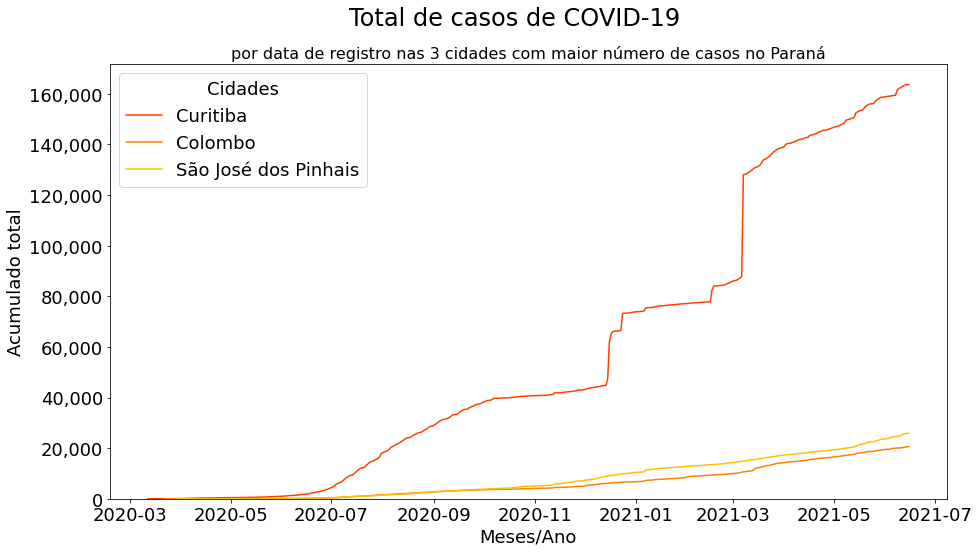

In [5]:
grafico_linha(titulo = 'Total de casos de COVID-19', df_y = 'last_available_confirmed')

Com esse primeiro gráfico já conseguimos ter uma noção de que, mesmo com as 3 cidades onde houve o maior número de casos confirmados no Paraná, é possível ver que Curitiba, provavelmente por ser capital e o centro econômico do estado, tem um número extremamente maior em relação as outras cidades.

Porém, gostaria de fazer uma resalva em um padrão que podemos encontrar ali no próprio gráfico, onde temos esse desenho de uma "escadinha". Isso nos levar a criar algumas hipoteses e conclusões breves, como por exemplo:
- O número de casos acumulados, nos mostra uma gráfico gradual, ou seja, um ponto específico no eixo x (Meses/Ano) sempre vai ter um valor maior ou igual no eixo y (Acumulado total) em relação à um ponto anterior a esse;
- Esse crescimento provavelmente terá uma relação direta com a quantidade de registros novos que tivermos (veremos no gráfico a baixo).

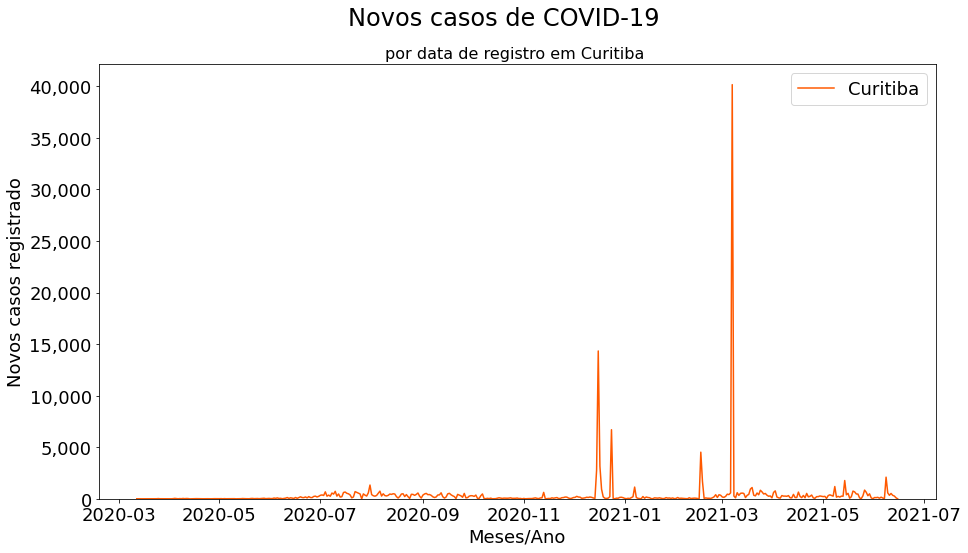

In [6]:
grafico_linha(df=df_casos_cwb, titulo = 'Novos casos de COVID-19', subtitle = 'por data de registro em Curitiba ', y_label = 'Novos casos registrado', df_y = 'new_confirmed', titulo_legenda = '', palette_color='hot_r')

Como suspeitamos, existe sim uma relação em o comportamento do casos novos (registrados no sistema) e os casos acumulados:

- Regiões/períodos onde a quantidade de casos novos chega muito próximo de zero, ou é zero de fato, o gráfico que mostra o total acumulado tende a ficar constante, ou seja, com um crescimento super baixo ou zerado.

- Regiões/períodos com maior número de inserção impactam no desenho de acumulado total gerando aquela "escadinha" no gráfico.

- Esse comportamento de "picos" que fogem do padrão provavelmente são referentes a regras de coleta de dados, suponho que nesses períodos houve alguma espécie de alteração na forma como era definido e registrado um novo casos confirmado de COVID-19, por exemplo, alterações na forma como é medido o teste em relação ao nível de anticorpos no DNA do individuo testado que define se a pessoa tem ou não o vírus.
<br/>

Agora, vamos visualizar os gráficos referentes ao total de mortes e novas mortes por COVID-19 registradas nessa série temporal.

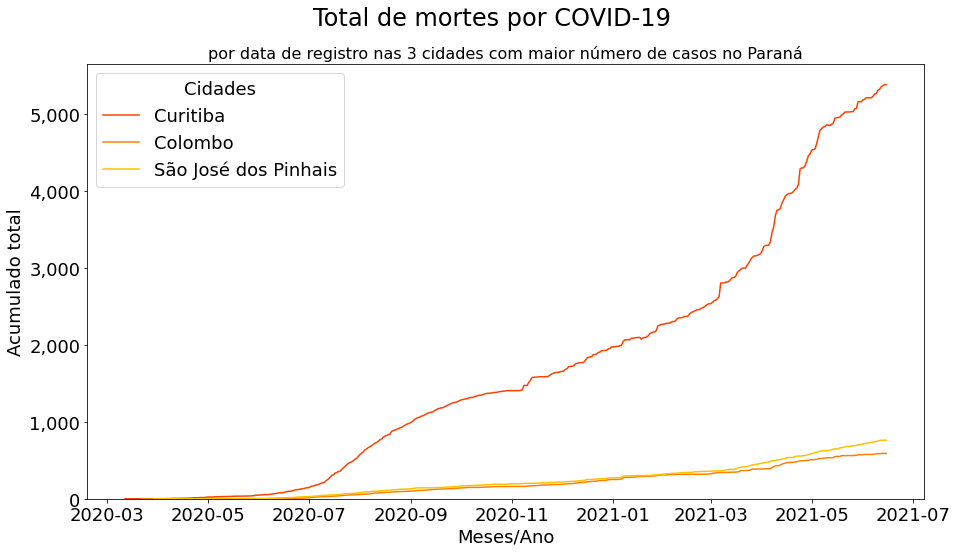

In [7]:
grafico_linha()

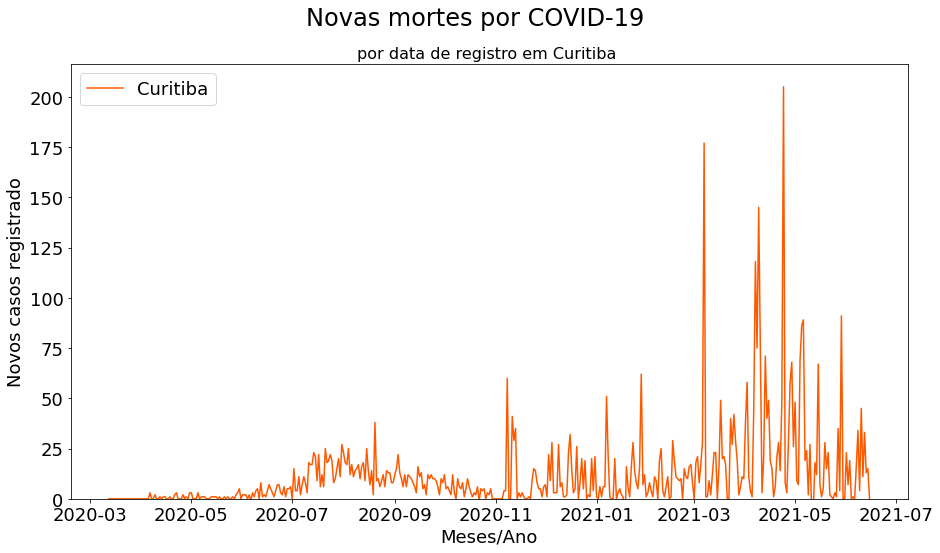

In [8]:
grafico_linha(df=df_casos_cwb, titulo = 'Novas mortes por COVID-19', subtitle = 'por data de registro em Curitiba ',  y_label = 'Novos casos registrados', df_y = 'new_deaths', titulo_legenda = '', palette_color='hot_r')

Com esses dois gráficos, conseguimos ver que também existe uma relação entre os "picos" de novos casos registrado e o comportamento do crescimento.

Apesar de ver algumas "escadinhas" no gráfico que mostra o acumulado total, elas são mais suaves devido a escala de mortes ser menor em relação aos casos confirmados.


In [65]:
def return_modelo_previsao(dataframe = df_casos_cwb, ds = 'date', y = 'last_available_deaths', dados_treino = 400, periodo_previsao = 30):
  df = pd.DataFrame()
  df_teste = pd.DataFrame()

  df['ds'] = dataframe[ds][:dados_treino]
  df['y'] = dataframe[y][:dados_treino]

  df_teste['ds'] = dataframe[ds][dados_treino:(dados_treino+periodo_previsao)]
  df_teste['y'] = dataframe[y][dados_treino:(dados_treino+periodo_previsao)]

  modelo = Prophet()

  modelo.fit(df)

  previsao = modelo.predict(modelo.make_future_dataframe(periods=periodo_previsao))

  return modelo, previsao, df_teste

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


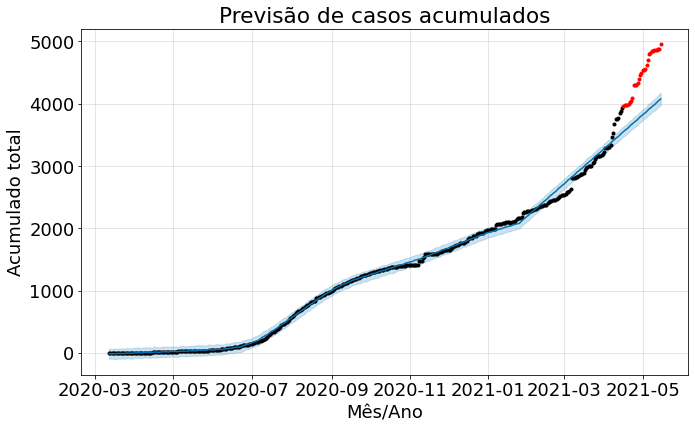

In [66]:
modelo, previsao, df_teste = return_modelo_previsao(dataframe = df_casos_cwb, ds = 'date', y = 'last_available_deaths')

ax = modelo.plot(previsao,xlabel = 'Mês/Ano', ylabel='Acumulado total');
plt.title('Previsão de casos acumulados')
plt.plot(df_teste['ds'], df_teste['y'],'.r')

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


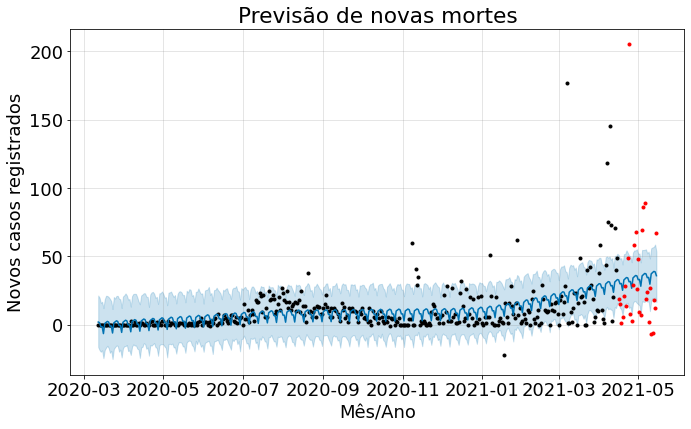

In [67]:
modelo, previsao, df_teste = return_modelo_previsao(dataframe = df_casos_cwb, ds = 'date', y = 'new_deaths')

ax = modelo.plot(previsao,xlabel = 'Mês/Ano', ylabel='Novos casos registrados');
plt.title('Previsão de novas mortes')
plt.plot(df_teste['ds'], df_teste['y'],'.r')